# Application of Wavelet based K-means Algorithm in Mammogram Segmentation


In [48]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import pywt
from sklearn.cluster import KMeans

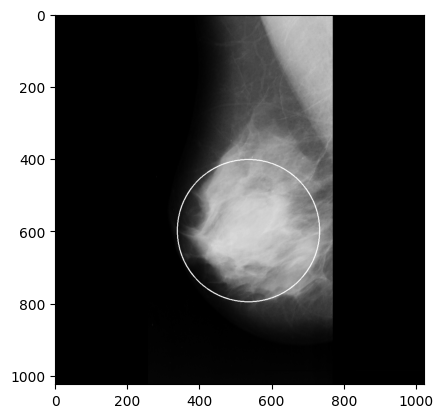

In [23]:
# load .pgm image
img = cv.imread('mdb001.pgm', cv.IMREAD_GRAYSCALE)

# draw a circle at 
x = 535
y = 1024 - 425
r = 197
cv.circle(img, (x, y), r, (255, 255, 255), 2)



plt.imshow(img, cmap='gray')

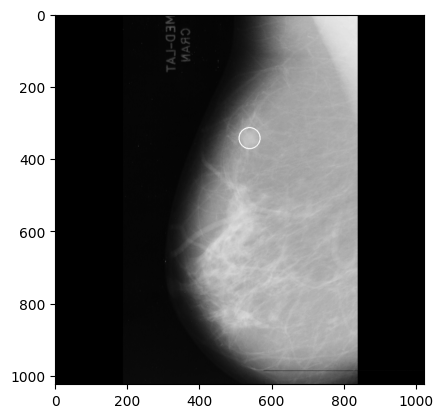

In [22]:
# load .pgm image
img = cv.imread('mdb023.pgm', cv.IMREAD_GRAYSCALE)

# draw a circle at 538 681 29
x = 538
y = 1024 - 681
r = 29

# convert from breast coordinate system to image coordinate system


cv.circle(img, (x, y), r, (255, 255, 255), 2)


plt.imshow(img, cmap='gray')

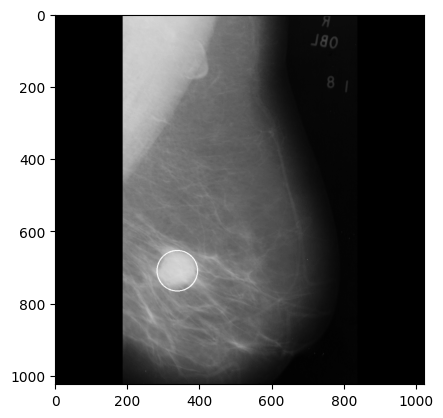

In [ ]:
# load .pgm image
img = cv.imread('mdb028.pgm', cv.IMREAD_GRAYSCALE)

# draw a circle at 538 681 29
x = 338
y = 1024 - 314
r = 56

# 338 314 56

# # convert from breast coordinate system to image coordinate system


cv.circle(img, (x, y), r, (255, 255, 255), 2)


plt.imshow(img, cmap='gray')

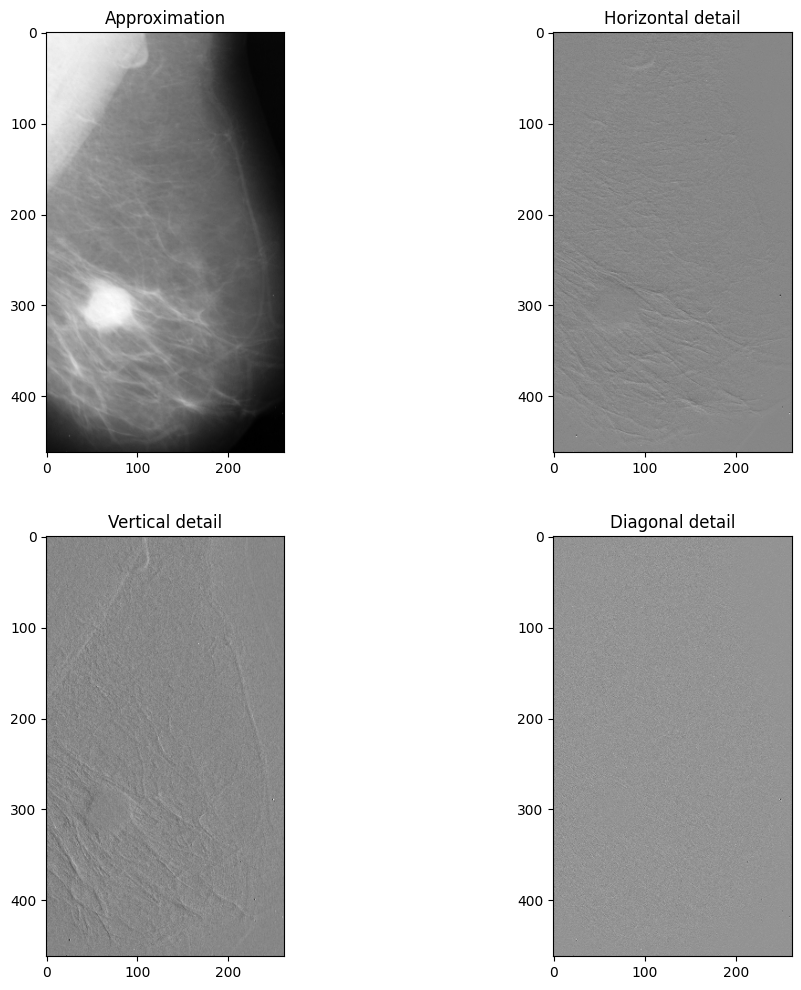

In [89]:
img = cv.imread('mdb028.pgm', cv.IMREAD_GRAYSCALE)
img = img[100:, 200:-300] # for 028
# img = img[:, 100:-280]

coeffs2 = pywt.dwt2(img, 'haar')

LL, (LH, HL, HH) = coeffs2

fig, ax = plt.subplots(2, 2, figsize=(12, 12))
ax[0, 0].imshow(LL, cmap='gray')
ax[0, 0].set_title('Approximation')
ax[0, 1].imshow(LH, cmap='gray')
ax[0, 1].set_title('Horizontal detail')
ax[1, 0].imshow(HL, cmap='gray')
ax[1, 0].set_title('Vertical detail')
ax[1, 1].imshow(HH, cmap='gray')
ax[1, 1].set_title('Diagonal detail')
plt.show()


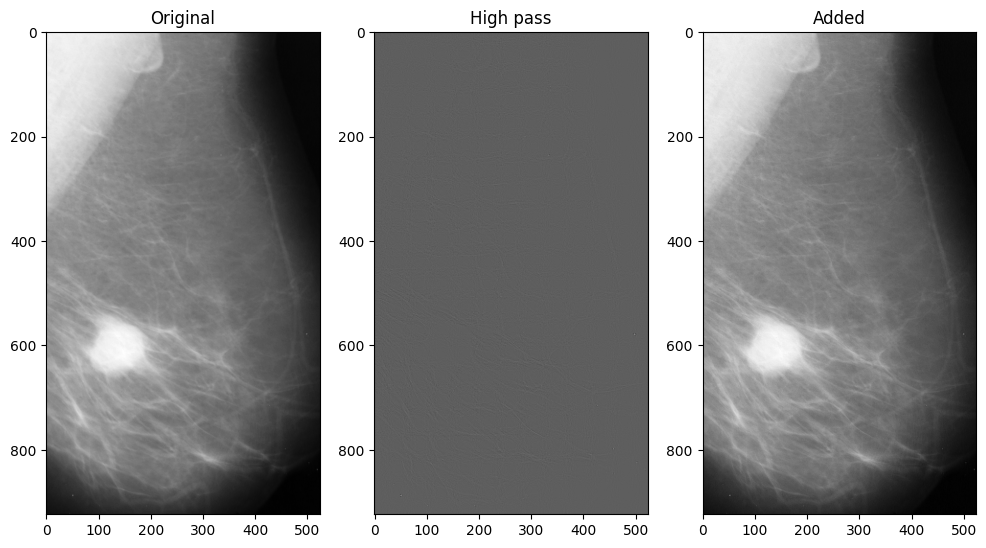

In [90]:
LL_zeroed = np.zeros(LL.shape)
coeffs2_modified = LL_zeroed, (LH, HL, HH)

high_pass_image = pywt.idwt2(coeffs2_modified, 'haar')

# added = img + high_pass_image
img = img.astype(np.float32)
added = img + high_pass_image

added = np.clip(added, 0, 255)
added = added.astype(np.uint8)

fig, ax = plt.subplots(1, 3, figsize=(12, 12))
ax[0].imshow(img, cmap='gray')
ax[0].set_title('Original')
ax[1].imshow(high_pass_image, cmap='gray')
ax[1].set_title('High pass')

ax[2].imshow(added, cmap='gray')
ax[2].set_title('Added')

plt.show()

/home/sanika/miniconda3/envs/ml/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/sanika/miniconda3/envs/ml/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


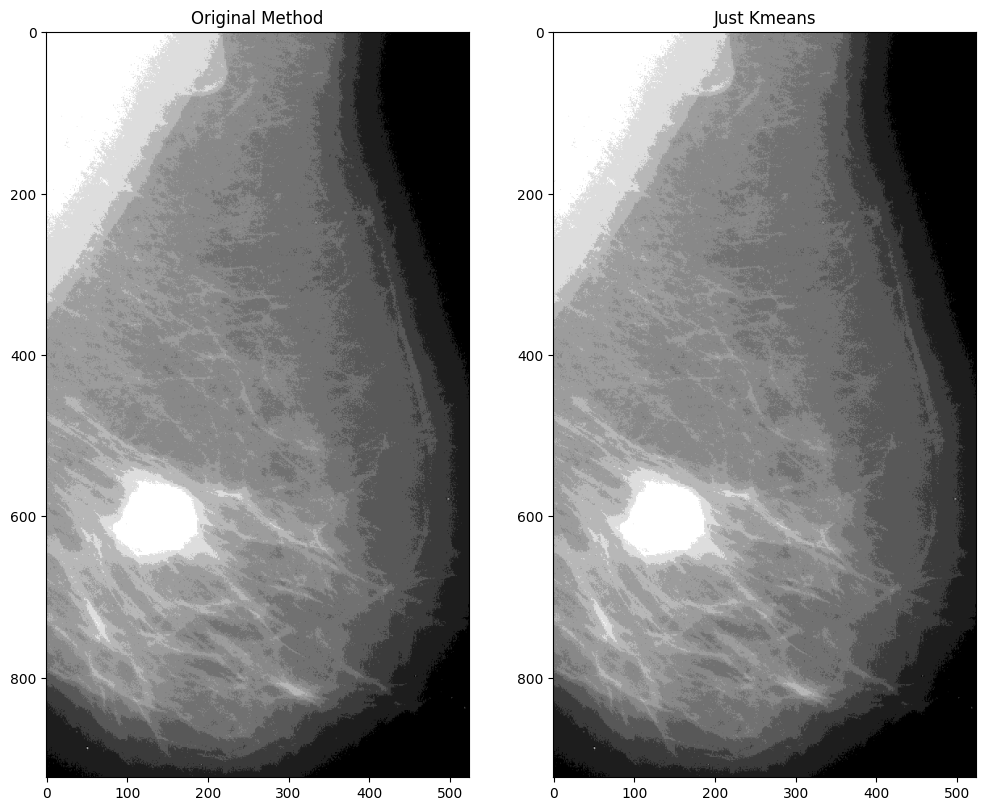

In [97]:
# kmeans  to get segmentation
k = 10
kmeans = KMeans(n_clusters=k, random_state = 42)
kmeans.fit(added.reshape(-1, 1))
labels = kmeans.labels_
centers = kmeans.cluster_centers_
segmented_image = centers[labels.flatten()].reshape(added.shape).astype(np.uint8)

kmeans = KMeans(n_clusters=k, random_state = 42)
kmeans.fit(added.reshape(-1, 1))
labels = kmeans.labels_
centers = kmeans.cluster_centers_
segmented_image_without_modifications = centers[labels.flatten()].reshape(img.shape).astype(np.uint8)

fig, axs = plt.subplots(1, 2, figsize=(12, 12))
axs[0].imshow(segmented_image, cmap='gray')
axs[0].set_title('Original Method')
axs[1].imshow(segmented_image_without_modifications, cmap='gray')
axs[1].set_title('Just Kmeans')
plt.show()

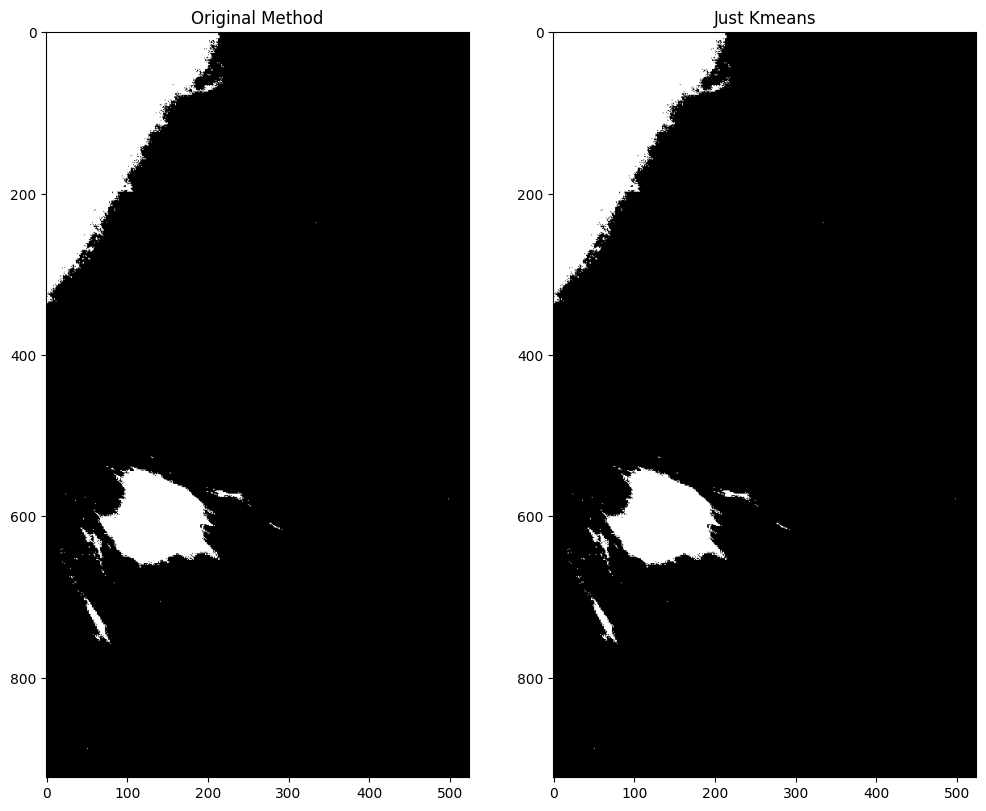

In [99]:
# threshold the images
_, thresholded = cv.threshold(segmented_image, 170, 255, cv.THRESH_BINARY)
_, thresholded_without_modifications = cv.threshold(segmented_image_without_modifications, 170, 255, cv.THRESH_BINARY)

fig, axs = plt.subplots(1, 2, figsize=(12, 12))
axs[0].imshow(thresholded, cmap='gray')
axs[0].set_title('Original Method')
axs[1].imshow(thresholded_without_modifications, cmap='gray')
axs[1].set_title('Just Kmeans')
plt.show()